# Test xgboost model

In [3]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import xarray as xr
import copy
import matplotlib.pyplot as plt
import src.models.xgb as xgb

In [5]:
x_da, y_da = xgb.return_x_y_da(
    take_esa_coords=True,
    use_mfd=True,
)

x/y values premade. Reusing them.
'return_x_y_da'  1.16983 s



In [6]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


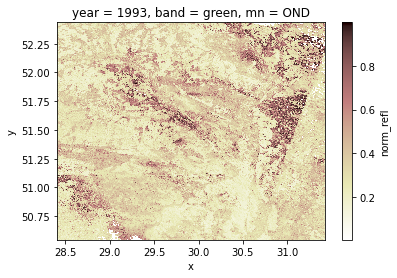

In [7]:
x_da.isel(year=1, mn=3, band=1).plot(cmap="pink_r")

In [8]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [9]:
y_da

<xarray.DataArray 'esa_cci' (year: 24, y: 681, x: 1086)>
dask.array<open_dataset-fae47f080d9dff4aa9e1ee5aa66bc516esa_cci, shape=(24, 681, 1086), dtype=uint8, chunksize=(1, 681, 1086), chunktype=numpy.ndarray>
Coordinates:
    band     int64 ...
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [10]:
y_da.isel(year=5).plot(cmap=cm)

NameError: name 'cm' is not defined

In [ ]:
x_da.isel(year=2, mn=3).plot(cmap=cm)

In [40]:
cm = copy.copy(plt.get_cmap("pink_r"))
cm.set_bad("gray")

In [94]:
x_tr, y_tr = xgb.return_xy_npa(
            x_da, y_da, year=range(0, 5)
        )

'return_xy_npa'  13.23970 s



In [36]:
x_tr.shape

(3697830, 12)

In [98]:
x_tr

array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
        0.285     ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
        0.2445    ],
       [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
        0.25583333],
       [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
        0.18666667]], dtype=float32)

In [38]:
y_tr.shape

(3697830,)

In [91]:
xgb.return_xy_npa(x_da.isel(year=range(0, 5)),
                  xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))),
                  year=range(0, 5))

'y_npa_to_xarray'  0.01133 s

'return_xy_npa'  19.08702 s



(array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
         0.285     ],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
         0.2445    ],
        [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
         0.25583333],
        [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
         0.18666667]], dtype=float32),
 array([  0, 100, 100, ...,  40,  40,   0], dtype=uint8))

'y_npa_to_xarray'  0.01072 s



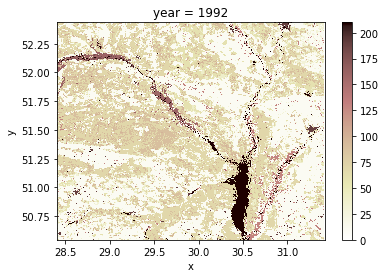

In [96]:
xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))).isel(year=0).plot(cmap=cm)

'x_npa_to_xarray'  0.15835 s



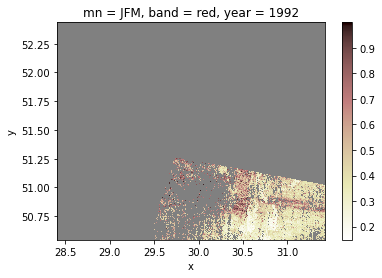

In [105]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=0, mn=0, band=0).plot(cmap=cm)

'x_npa_to_xarray'  0.22868 s



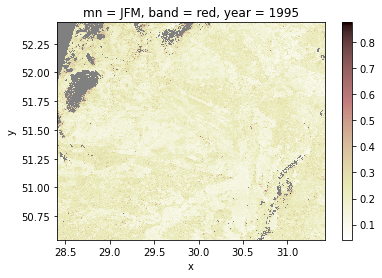

In [106]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=3, mn=0, band=0).plot(cmap=cm)

In [103]:
len(x_da.y.values)

681

Text(0, 0.5, 'count')

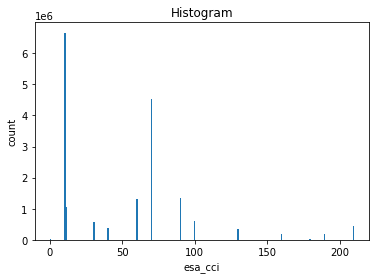

In [17]:
y_da.plot.hist(bins=211)
plt.ylabel('count')

In [18]:
x_da.plot.hist(bins=100)
    cfd = {
            "start_year_i": 0,
            "mid_year_i": 19,
            "end_year_i": 24,
            "take_esa_coords": True,
        }
    plt.ylabel('Count')

IndentationError: unexpected indent (<ipython-input-18-2d1ab74624c8>, line 2)

In [ ]:
cfd = {
            "start_year_i": 0,
            "mid_year_i": 19,
            "end_year_i": 24,
            "take_esa_coords": True,
        }
    

def test_inversibility():
    # run-20210225_161033-yxyit68w/
    x_all, y_all = xgb.return_xy_npa(
            x_da, y_da, 
            year=range(cfd["start_year_i"], cfd["end_year_i"]))  # all data as numpy.
    x_rp, y_rp = xgb.return_xy_npa(
               x_da.isel(year=range(cfd["start_year_i"], cfd["end_year_i"])),
                      xgb.npa_to_xarray(y_all, y_da.isel(year=range(cfd["start_year_i"],
                      cfd["end_year_i"]))),
                      year=range(cfd["start_year_i"], cfd["end_year_i"]))
    assert(np.all(y_all == y_rp))

test_inversibility()

In [28]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [29]:
x_all, y_all = xgb.return_xy_npa(
        x_da, y_da, 
        year=range(cfd["start_year_i"], cfd["end_year_i"]))

'return_xy_npa'  64.89961 s



In [37]:
x_da.isel(year=0, mn=0, band=1).values.shape

(681, 1086)

In [35]:
 y_da.isel(year=0).values.shape

(681, 1086)

In [27]:
x_val = np.asarray(
        [
            x_da.isel(year=range(0, 2), mn=mn, band=band).values.ravel()
            for mn in range(4)
            for band in range(3)
        ]
    )

KeyboardInterrupt: 

In [ ]:
x_val.shape

In [ ]:
y_val = y_da.isel(year=range(0, 2)) #.values.ravel()
y_val.shape

In [51]:
x_da.isel(year=range(0, 9), mn=0, band=0).shape

(681, 1086, 9)

In [52]:
y_da.isel(year=range(0, 9)).values.shape

(9, 681, 1086)

<xarray.DataArray 'esa_cci' (year: 24, y: 681, x: 1086)>
dask.array<open_dataset-fae47f080d9dff4aa9e1ee5aa66bc516esa_cci, shape=(24, 681, 1086), dtype=uint8, chunksize=(1, 681, 1086), chunktype=numpy.ndarray>
Coordinates:
    band     int64 ...
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [20]:
list(5)

TypeError: 'int' object is not iterable

In [22]:
type(range(0, 5))

range

In [26]:
isinstance(range(0, 5), range)

True

In [83]:

map_to_feat = np.array([[mn, band] for mn in range(4) for band in range(3)])
n_l = []
for i in range(map_to_feat.shape[0]):
    print(map_to_feat[i, :])
    if len(n_l) <= map_to_feat[i][0]:
        n_l.append([])
    n_l[-1].append(x_tr[:, i].reshape(y_da.isel(year=range(0, 5)).values.shape))

dims = ("mn", "band", "year", "y", "x")
coords_d = {}
for dim in dims:
    coords_d[dim] = x_da.isel(year=range(0, 5)).coords[dim].values

new_da = xr.DataArray(
        data=np.array(n_l),
        dims=dims,
        coords=coords_d,
    )

[0 0]
[0 1]
[0 2]
[1 0]
[1 1]
[1 2]
[2 0]
[2 1]
[2 2]
[3 0]
[3 1]
[3 2]


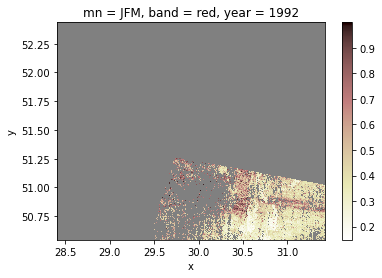

In [86]:
new_da.isel(mn=0, band=0, year=0).plot(cmap=cm)

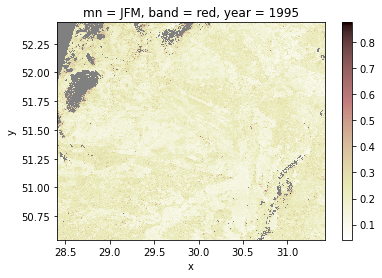

In [87]:
new_da.isel(mn=0, band=0, year=3).plot(cmap=cm)

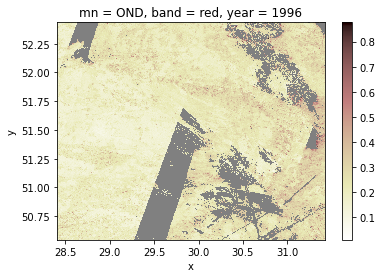

In [90]:
new_da.isel(mn=3, band=0, year=4).plot(cmap=cm)

In [74]:
x_da.dims

('y', 'x', 'band', 'year', 'mn')

{'mn': array(['JFM', 'AMJ', 'JAS', 'OND'], dtype=object), 'band': array(['red', 'green', 'blue'], dtype=object), 'year': array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int32), 'y': array([52.43472222, 52.43194444, 52.42916667, 52.42638889, 52.42361111,
       52.42083333, 52.41805556, 52.41527778, 52.4125    , 52.40972222,
       52.40694444, 52.40416667, 52.40138889, 52.39861111, 52.39583333,
       52.39305556, 52.39027778, 52.3875    , 52.38472222, 52.38194444,
       52.37916667, 52.37638889, 52.37361111, 52.37083333, 52.36805556,
       52.36527778, 52.3625    , 52.35972222, 52.35694444, 52.35416667,
       52.35138889, 52.34861111, 52.34583333, 52.34305556, 52.34027778,
       52.3375    , 52.33472222, 52.33194444, 52.32916667, 52.32638889,
       52.32361111, 52.32083333, 52.31805556, 52.31527778, 52.3125    ,
       52.30972222, 52.30694444, 52.30416667, 

In [52]:
map_to_feat.shape

(12, 2)

In [61]:
y_tr.shape

(3697830,)

In [62]:
x_tr.shape

(3697830, 12)

In [68]:
len(x_da.y.values)

681

In [69]:
len(x_da.x.values)

1086

In [70]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray
